# Solutions

4. [Matplotlib Data Plotting](#4.-Matplotlib-Basic-Plotting)
5. [Plotting with Pandas](#5.-Plotting-with-Pandas)
6. [Seaborn](#6.-Seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 4. Matplotlib Data Plotting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exercise 1
<span  style="color:green; font-size:16px">Create a Figure with three Axes using `plt.subplots`. Use `np.linspace` to create a one dimensional array of data from -5 to 5 of length 100 and store this to `x`. In each of three Axes, plot take some mathematical function of `x` to create `y` values in a line plot. For instance, you can take the square root of `x`.</span>

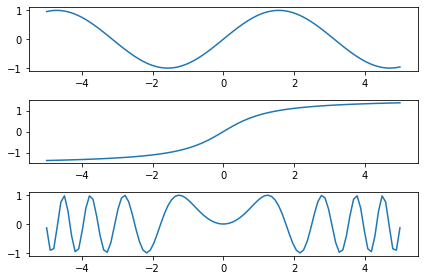

In [3]:
fig, ax_array = plt.subplots(3, 1)
ax1 = ax_array[0]
ax2 = ax_array[1]
ax3 = ax_array[2]
x = np.linspace(-5, 5, 100)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.arctan(x))
ax3.plot(x, np.sin(x ** 2))
fig.tight_layout() # this makes all Axes fit correctly

### Exercise 2
<span  style="color:green; font-size:16px">Use `np.random.rand` to create two arrays, `x` and `y` that are each 100 units in length. Make a scatter plot of the data. Make the size of the markers proportional to the ratio of y to x. Make the color proportional to y. For scatter plots, use the parameter `c` to control the color with a number. The parameter `s` controls the size. Set the title as well.</span>

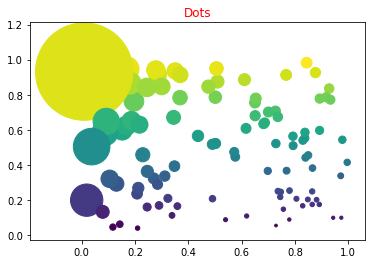

In [4]:
x = np.random.rand(100)
y = np.random.rand(100)

fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(x, y, c=y, s=y / x * 100)
ax.set_title('Dots', color='Red');

### Exercise 3
<span  style="color:green; font-size:16px">Read in the college dataset and set the index to the institution name. Complete the following tasks:</span>

<span  style="color:green; font-size:16px">
    
* Convert the median earnings within 10 years (MD_EARN_WNE_P10) column to numeric
* Create a column for the total SAT score
* Select just the columns for SAT total, UGDS, RELAFFIL and MD_EARN_WNE_P10 into another DataFrame called `college_samp`. Continue with this DataFrame for the rest of the Exercise.
* Drop any rows with missing values
* Randomly sample 10% of the DataFrame and assign it back to itself.
* Call the `map` method on the `RELAFFIL` column. Pass it a dictionary to convert the values to color names. Assign the result to the column `color`
* Take the square root of the UGDS column and assign it to the column `size`. 
* Create a scatterplot of the total SAT scores vs the MD_EARN_WNE_P10 column. Color and size each point with their respective columns.
* Extra Credit: Annotate the school with the largest population as it is done [in this example](https://matplotlib.org/users/annotations.html)</span>

In [5]:
college = pd.read_csv("../data/college.csv", index_col='instnm')
college['md_earn_wne_p10'] = pd.to_numeric(college['md_earn_wne_p10'], errors='coerce')
college['sat_total'] = college['satmtmid'] + college['satvrmid']
college_samp = college[['sat_total', 'ugds', 'relaffil', 'md_earn_wne_p10']]
college_samp = college_samp.dropna()
college_samp = college_samp.sample(frac=.1)
college_samp['color'] = college_samp['relaffil'].map({0: 'forestgreen', 1:'violet'})
college_samp['size'] = college_samp['ugds'] ** .5
max_school = college_samp['ugds'].idxmax()
x = college_samp.loc[max_school, 'sat_total']
y = college_samp.loc[max_school, 'md_earn_wne_p10']
college_samp.head()

,sat_total,ugds,relaffil,md_earn_wne_p10,color,size
instnm,,,,,,
Savannah College of Art and Design,1065.0,8846.0,0,35100.0,forestgreen,94.053176
Le Moyne-Owen College,730.0,989.0,1,25600.0,violet,31.448370
Fairmont State University,935.0,3699.0,0,33400.0,forestgreen,60.819405
Huntington University,1004.0,1001.0,1,34400.0,violet,31.638584
SUNY College at Geneseo,1220.0,5497.0,0,46200.0,forestgreen,74.141756


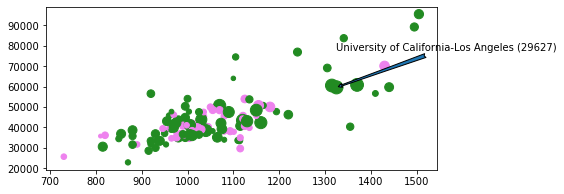

In [6]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.scatter('sat_total', 'md_earn_wne_p10', data=college_samp, c='color', s='size')
max_ugds = int(college_samp['ugds'].max())
school_size = max_school + f' ({max_ugds})'
ax.annotate(school_size, xy=(x, y), xytext=(x, y * 1.3), arrowprops={'arrowstyle': 'fancy'});

### Exercise 4
<span  style="color:green; font-size:16px">Read in the employee dataset and select the `salary` column as a Series, drop the missing values, and assign it to a variable. Read about the `pd.cut` function and create categories that span 25k from 0 to 300k. Save this result as a Series and find the frequency of each category. Then take that result and create a `pie` chart with labels.</span>

In [7]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])
emp.head()

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
4,Police,SENIOR POLICE OFFICER,2006-01-23,69355.26,Male,White


In [8]:
s = pd.cut(emp['salary'], bins=range(0, 300000, 25000))
df_cat = s.value_counts().reset_index()
df_cat.columns = ['Salary Range', 'Count']
df_cat

,Salary Range,Count
0,"(25000, 50000]",9289
1,"(50000, 75000]",9230
2,"(75000, 100000]",3950
3,"(100000, 125000]",588
4,"(125000, 150000]",134
5,"(150000, 175000]",72
6,"(175000, 200000]",38
7,"(0, 25000]",34
8,"(200000, 225000]",5
9,"(250000, 275000]",4


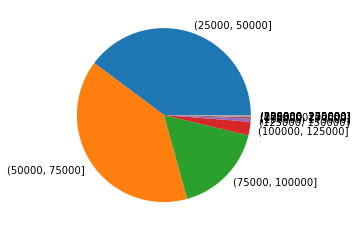

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie('Count', labels='Salary Range', data=df_cat);

## 5. Plotting with Pandas

In [10]:
import pandas as pd

### Exercise 1
<span  style="color:green; font-size:16px">In this Exercise we will test whether daily returns from stocks are normally distributed. Complete the following tasks:
* Take the `stocks` DataFrame and call the `pct_change` method to get the daily return percentage and assign it to a variable. 
* Assign the mean and standard deviation of each column (these will return Series) to separate variables. 
* Standardize your columns by subtracting the mean and dividing by the standard deviation. You have now produced a z-score for each daily return. 
* Add a column to this DataFrame called `noise` by calling `np.random.randn` which creates random normal variables.
* Plot the KDE for each column in your DataFrame. If the stock returns are normal, then the shapes of the curves will all look the same.
* Limit the xaxis to be between -3 and 3.
* Are stock retunrs normally distributed?</span>

In [11]:
stocks = pd.read_csv('../data/stocks/stocks10.csv', index_col='date', parse_dates=['date'])
stocks.head(3)

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN


In [12]:
stock_pct_change = stocks.pct_change()
stock_pct_change.head(3)

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-10-26,-0.000670,0.008621,-0.021739,-0.018127,NaN,-0.026107,-0.048217,0.029797,NaN,NaN
1999-10-27,-0.016432,0.017094,-0.007808,-0.065354,NaN,-0.004308,-0.004581,0.057292,NaN,NaN


In [13]:
mean = stock_pct_change.mean()
std = stock_pct_change.std()
stock_normal = (stock_pct_change - mean) / std
stock_normal['noise'] = np.random.randn(len(stocks))
stock_normal.head()

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V,noise
date,,,,,,,,,,,
1999-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.725926
1999-10-26,-0.060696,0.286300,-0.994959,-0.577644,NaN,-1.750644,-3.231718,1.827176,NaN,NaN,0.297041
1999-10-27,-0.885861,0.616294,-0.368504,-1.992386,NaN,-0.308034,-0.327185,3.529553,NaN,NaN,0.468362
1999-10-28,-0.596791,0.768740,0.173134,-1.983325,NaN,1.217916,3.419352,5.133515,NaN,NaN,-2.221169
1999-10-29,1.544427,1.072441,1.663113,-0.194959,NaN,0.851540,0.663056,0.639230,NaN,NaN,0.112695


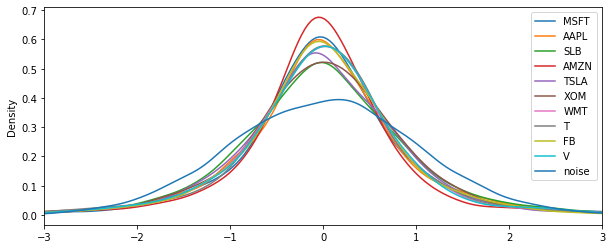

In [14]:
stock_normal.plot(kind='kde', xlim=[-3, 3], figsize=(10, 4));

No, There is quite a bit more area under the curve between -1 and 1 standard deviations. Also, there is a lot more are outside of 3 standard deviations (can't see this from the graph).

### Exercise 2
<span  style="color:green; font-size:16px">Use Pandas to plot a horizontal bar plot of diamond cuts.</span>

In [15]:
diamonds = pd.read_csv('../data/diamonds.csv')
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [16]:
cut_count = diamonds['cut'].value_counts()
cut_count

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

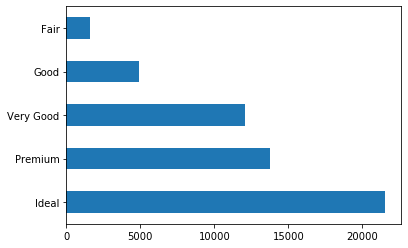

In [17]:
cut_count.plot(kind='barh');

In [18]:
plt.style.use(['ggplot'])

### Exercise 3

<span  style="color:green; font-size:16px">Make a visualization that easily shows the differences in average salary by sex for each department of the employee dataset.</span>

In [19]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])
emp.head(3)

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black


In [20]:
dept_sex_sal = emp.pivot_table(index='dept', columns='sex', values='salary')
dept_sex_sal.head(3)

sex,Female,Male
dept,,
Fire,62212.637250,60479.306862
Health & Human Services,53838.310780,59230.425956
Houston Airport System,51099.300226,57278.306598


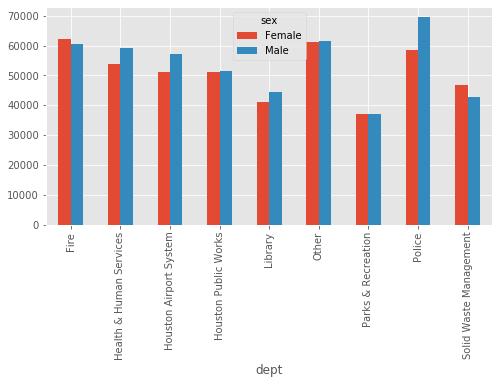

In [21]:
dept_sex_sal.plot(kind='bar', figsize=(8, 4));

### Exercise 4
<span  style="color:green; font-size:16px">Split the employee data into two separate DataFrames. Those who have a hire date after the year 2000 and those who have one before. Make the same plot above for each group.</span>

In [22]:
criteria = emp['hire_date'].dt.year >= 2000

In [23]:
emp_2000_and_later = emp[criteria]
emp_2000_and_later.head(3)

,dept,title,hire_date,salary,sex,race
0,Police,POLICE SERGEANT,2001-12-03,87545.38,Male,White
1,Other,ASSISTANT CITY ATTORNEY II,2010-11-15,82182.00,Male,Hispanic
2,Houston Public Works,SENIOR SLUDGE PROCESSOR,2006-01-09,49275.00,Male,Black


In [24]:
dept_gender_sal_2000_and_later =  emp_2000_and_later.pivot_table(index='dept', 
                                                                 columns='sex', 
                                                                 values='salary')
dept_gender_sal_2000_and_later.head(3)

sex,Female,Male
dept,,
Fire,59185.247973,57016.700243
Health & Human Services,54267.524020,58113.680000
Houston Airport System,50402.349398,56314.303226


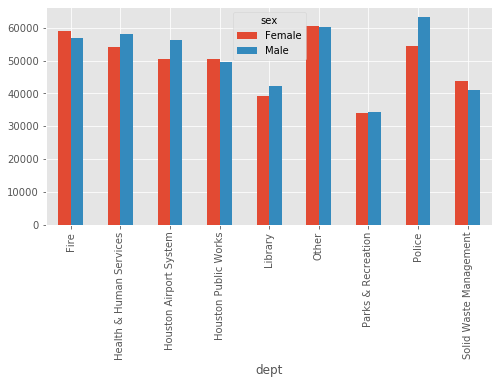

In [25]:
dept_gender_sal_2000_and_later.plot(kind='bar', figsize=(8, 4));

In [26]:
emp_before_2000 = emp[~criteria]
emp_before_2000.head(3)

,dept,title,hire_date,salary,sex,race
3,Police,SENIOR POLICE OFFICER,1997-05-27,75942.10,Male,Hispanic
9,Police,SENIOR POLICE OFFICER,1993-08-30,75942.10,Male,Black
17,Police,POLICE COMMANDER,1983-02-07,115821.42,Male,White


In [27]:
dept_sex_sal_before_2000 =  emp_before_2000.pivot_table(index='dept', 
                                                                 columns='sex', 
                                                                 values='salary')
dept_sex_sal_before_2000.head(3)

sex,Female,Male
dept,,
Fire,67082.785217,71182.220495
Health & Human Services,51989.924731,65284.364561
Houston Airport System,53183.873874,61184.725490


Can drop missing values so that we can compare

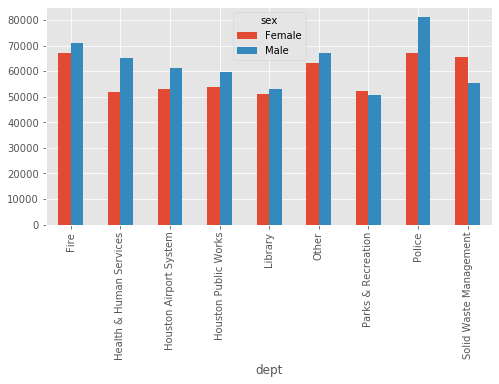

In [28]:
dept_sex_sal_before_2000.dropna().plot(kind='bar', figsize=(8, 4));

Execute the next cell to read in the flights dataset and use it for the remaining exercises.

In [29]:
flights = pd.read_csv('../data/flights.csv', parse_dates=['date'])
flights.head(3)

,date,airline,origin,dest,dep_time,arr_time,cancelled,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-01-01,UA,LAS,IAH,100,547,0,134.0,1222.0,0,0,0,0,0
1,2018-01-01,B6,PSE,MCO,500,707,0,170.0,1179.0,0,0,9,0,138
2,2018-01-01,WN,DEN,PHX,515,720,0,91.0,602.0,0,0,0,0,0


### Exercise 5
<span  style="color:green; font-size:16px">Use the `flights` data set. Plot the counts of the number of flights per day of week.</span>

In [30]:
weekday_ct = flights['date'].dt.day_name().value_counts()
weekday_ct

Monday       45193
Friday       44640
Thursday     44399
Wednesday    43665
Tuesday      42927
Sunday       42621
Saturday     36555
Name: date, dtype: int64

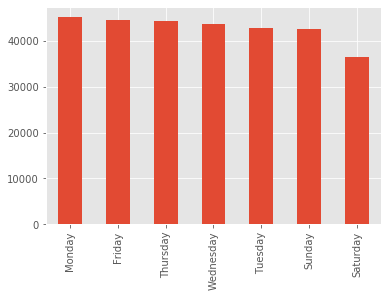

In [31]:
weekday_ct.plot(kind='bar');

### Exercise 6
<span  style="color:green; font-size:16px">Plot the average carrier delay per day of week.</span>

In [32]:
flights['day_of_week'] = flights['date'].dt.day_name()

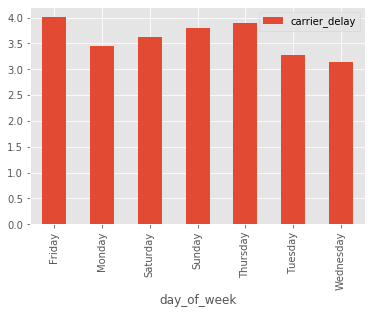

In [33]:
flights.groupby('day_of_week').agg({'carrier_delay': 'mean'}).plot(kind='bar');

### Exercise 7
<span  style="color:green; font-size:16px">Plot the average carrier delay per day of week per airline.</span>

In [34]:
airline_weekday_delay = flights.pivot_table(index='airline', 
                                            columns='day_of_week', 
                                            values='carrier_delay')
airline_weekday_delay.head(3)

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
airline,,,,,,,
9E,4.945666,4.178974,2.810464,2.490153,4.312580,3.188482,3.048481
AA,4.582222,3.897604,4.067344,4.410544,4.776438,3.854045,3.512177
AS,2.034650,2.154245,2.291442,2.317705,2.222942,1.526755,2.318277


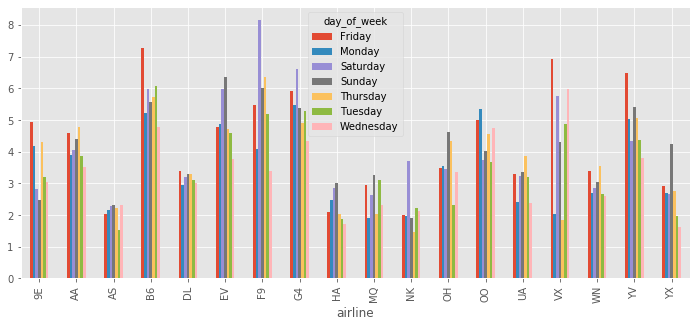

In [35]:
airline_weekday_delay.plot(kind='bar', figsize=(12, 5));

## 6. Seaborn